## 最高分和最低分趋势分析

In [146]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [147]:
student_info=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\2_student_info.csv")
chengji=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\5_chengji.csv")
examtype=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\6_exam_type.csv")

In [148]:
# 当前在校学生信息
student_info.columns=[u'学生id',u'学生姓名',u'性别',u'民族',u'出生日期',u'班级名',u'家庭住址',u'家庭类型',u'政治面貌',u'班级id',u'班级学期',u'是否住校',u'是否退学',u'宿舍号']
# student_info['是否退学'].fillna(value=0) #将NaN替换为0
print(student_info.dtypes) # 查看dataframe中的数据类型
student_info.head(5)
# 学生成绩
chengji.columns=['考试id','考试编号','考试编码名称','考试学科id','考试学科名','考试学期','考试类型','考试开始时间','学生id','考试成绩','Z_score','T_score','等第']
# 使用pandas的to_datatime函数转换为标准日期格式
print(chengji['考试学期'].unique())

# 考试类型
examtype.columns=['考试类型id','考试类型名称']

学生id      int64
学生姓名     object
性别       object
民族       object
出生日期    float64
班级名      object
家庭住址     object
家庭类型     object
政治面貌     object
班级id      int64
班级学期     object
是否住校    float64
是否退学     object
宿舍号     float64
dtype: object
['2018-2019-1' '2017-2018-2' '2017-2018-1' '2016-2017-2' '2016-2017-1'
 '2015-2016-2' '2015-2016-1' '2014-2015-2' '2014-2015-1' '2013-2014-2'
 '2013-2014-1']


### 2.1  汇总各个科目班级历史最高分趋势和历史最低分趋势

#### 2.1.1 各学期科目最高分

In [166]:
# 删除考试成绩为负值的行
special=chengji.ix[(chengji['考试成绩']==-1)|(chengji['考试成绩']==-2)|(chengji['考试成绩']==-3)]
score=chengji[-chengji['考试成绩'].isin(special['考试成绩'])]
score=pd.merge(score,examtype,left_on='考试类型',right_on='考试类型id')
score=score[(score['考试类型名称']=='期末')|(score['考试类型名称']=='期中')|(score['考试类型名称']=='总评')
        |(score['考试类型名称']=='十校联考')|(score['考试类型名称']=='五校联考') ]
print(score['考试类型名称'].unique())

#筛选政治课
zhengzhi=score.loc[score['考试学科名']=='政治']
zhengzhi_max=zhengzhi.groupby(['考试学期'])['考试成绩'].max()
zhengzhi_min=zhengzhi.groupby(['考试学期'])['考试成绩'].min()

# 筛选数学课
shuxue=score.loc[score['考试学科名']=='数学']
shuxue_max=shuxue.groupby(['考试学期'])['考试成绩'].max()
shuxue_min=shuxue.groupby(['考试学期'])['考试成绩'].min()

# 筛选语文课
yuwen=score.loc[score['考试学科名']=='语文']
yuwen_max=yuwen.groupby(['考试学期'])['考试成绩'].max()
yuwen_min=yuwen.groupby(['考试学期'])['考试成绩'].min()

# 筛选历史课
lishi=score.loc[score['考试学科名']=='历史']
lishi_max=lishi.groupby(['考试学期'])['考试成绩'].max()
lishi_min=lishi.groupby(['考试学期'])['考试成绩'].min()

# 筛选物理课
wuli=score.loc[score['考试学科名']=="物理"]
wuli_max=wuli.groupby(['考试学期'])['考试成绩'].max()
wuli_min=wuli.groupby(['考试学期'])['考试成绩'].min()

# 筛选生物课
shengwu=score.loc[score['考试学科名']=='生物']
shengwu_max=shengwu.groupby(['考试学期'])['考试成绩'].max()
shengwu_min=shengwu.groupby(['考试学期'])['考试成绩'].min()


# 筛选英语课
yingyu=score.loc[score['考试学科名']=='英语']
yingyu_max=yingyu.groupby(['考试学期'])['考试成绩'].max()
yingyu_min=yingyu.groupby(['考试学期'])['考试成绩'].min()


# 筛选地理课
dili=score.loc[score['考试学科名']=='地理']
dili_max=dili.groupby(['考试学期'])['考试成绩'].max()
dili_min=dili.groupby(['考试学期'])['考试成绩'].min()


#筛选化学课
huaxue=score.loc[score['考试学科名']=='化学']
huaxue_max=huaxue.groupby(['考试学期'])['考试成绩'].max()
huaxue_min=huaxue.groupby(['考试学期'])['考试成绩'].min()
huaxue_min.index

['总评' '期末' '期中' '五校联考' '十校联考']


Index(['2013-2014-1', '2013-2014-2', '2014-2015-1', '2014-2015-2',
       '2015-2016-1', '2015-2016-2', '2016-2017-1', '2016-2017-2',
       '2017-2018-1', '2017-2018-2', '2018-2019-1'],
      dtype='object', name='考试学期')

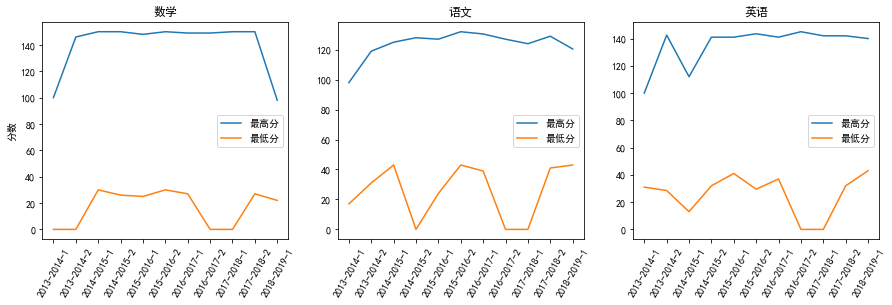

In [150]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(15,4))
fig.set(alpha=1)

 # 在一张大图里分别分列几个小图
plt.subplot(1,3,1) # 要生成两行两列，这是第一个图plt.subplot('行','列','编号')
plt.plot(shuxue_max,label='最高分')
plt.plot(shuxue_min,label='最低分')
plt.title('数学')
plt.ylabel('分数')
plt.xticks(rotation=60)
plt.legend()

plt.subplot(1,3,2)
plt.plot(yuwen_max,label='最高分')
plt.plot(yuwen_min,label='最低分')
plt.title('语文')
plt.xticks(rotation=60)
plt.legend()

#plt.legend(bbox_to_anchor=(1.2, 0.9))

plt.subplot(1,3,3) 
plt.plot(yingyu_max,label='最高分')
plt.plot(yingyu_min,label='最低分')
plt.title('英语')
plt.xticks(rotation=60)
plt.legend()

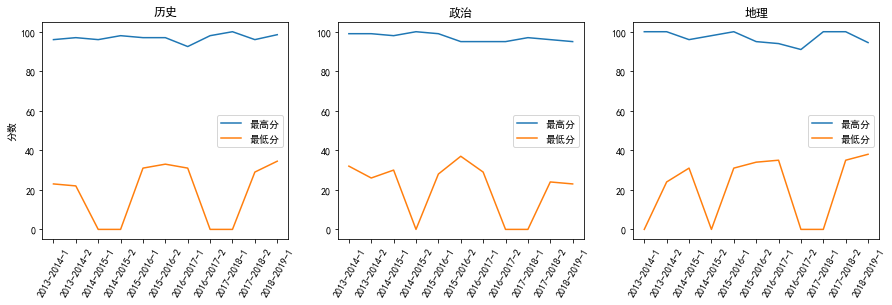

In [151]:
fig=plt.figure(figsize=(15,4))
fig.set(alpha=1)
    # 在一张大图里分别分列几个小图
plt.subplot(1,3,1) # 要生成两行两列，这是第一个图plt.subplot('行','列','编号')
plt.plot(lishi_max,label='最高分')
plt.plot(lishi_min,label='最低分')
plt.title('历史')
plt.ylabel('分数')
plt.xticks(rotation=60)
plt.legend()

plt.subplot(1,3,2)
plt.plot(zhengzhi_max,label='最高分')
plt.plot(zhengzhi_min,label='最低分')
plt.title('政治')
plt.xticks(rotation=60)
plt.legend()

#plt.legend(bbox_to_anchor=(1.2, 0.9))

plt.subplot(1,3,3) 
plt.plot(dili_max,label='最高分')
plt.plot(dili_min,label='最低分')
plt.title('地理')
plt.xticks(rotation=60)
plt.legend()

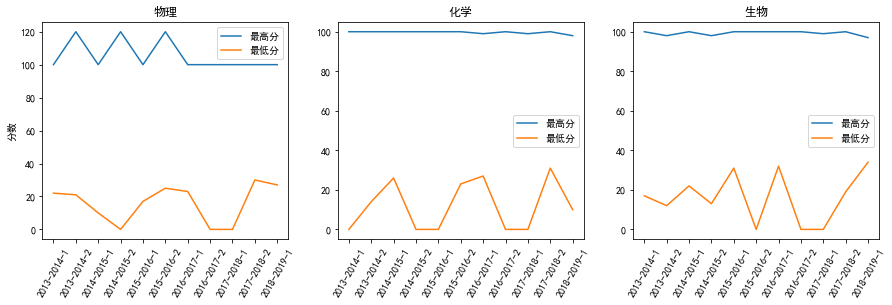

In [152]:
fig=plt.figure(figsize=(15,4))
fig.set(alpha=1)

plt.subplot(1,3,1) # 要生成两行两列，这是第一个图plt.subplot('行','列','编号')
plt.plot(wuli_max,label='最高分')
plt.plot(wuli_min,label='最低分')
plt.title('物理')
plt.ylabel('分数')
plt.xticks(rotation=60)
plt.legend()

plt.subplot(1,3,2)
plt.plot(huaxue_max,label='最高分')
plt.plot(huaxue_min,label='最低分')
plt.title('化学')
plt.xticks(rotation=60)
plt.legend()

#plt.legend(bbox_to_anchor=(1.2, 0.9))

plt.subplot(1,3,3) 
plt.plot(shengwu_max,label='最高分')
plt.plot(shengwu_min,label='最低分')
plt.title('生物')
plt.xticks(rotation=60)
plt.legend()

注意：只要有plt.legend()才会显示图例

In [153]:
from pyecharts import Line
index=shuxue_max.index
line=Line("各科最高分",width=800,height=300)
line.add('数学',index,shuxue_max.values)
line.add('语文',index,yuwen_max.values)
line.add('英语',index,yingyu_max.values)
line.add('历史',index,lishi_max.values)
line.add('地理',index,dili_max.values)
line.add('政治',index,zhengzhi_max.values)
line.add('化学',index,huaxue_max.values)
line.add('生物',index,shengwu_max.values)
line.add('物理',index,wuli_max.values,legend_pos='right',legend_top ='top',xaxis_rotate=30,yaxis_min=80,yaxis_max=150)
# legend_orient='vertical'
line.render(path='D:\Entertainment\Heaven Pool\各科最高分.html')
line

#### 2.1.2  各学期科目最低分

In [154]:
from pyecharts import Line
index=shuxue_max.index
line=Line("各科最低分",width=800,height=300)
line.add('数学',index,shuxue_min.values)
line.add('语文',index,yuwen_min.values)
line.add('英语',index,yingyu_min.values)
line.add('历史',index,lishi_min.values)
line.add('地理',index,dili_min.values)
line.add('政治',index,zhengzhi_min.values)
line.add('化学',index,huaxue_min.values)
line.add('生物',index,shengwu_min.values)
line.add('物理',index,wuli_min.values,legend_pos='right',legend_top ='top',xaxis_rotate=30,yaxis_min=0,yaxis_max=50)
# legend_orient='vertical'
line.render('D:\Entertainment\Heaven Pool\各科最低分.html')
line

### 2.2  各科目班级分数趋势

In [179]:
banji=student_info[['学生id','学生姓名','班级名']]
info=pd.merge(banji,score,on='学生id')  # 删除特殊情况的学生
#info=pd.merge(a,examtype,left_on='考试类型',right_on='考试类型id')
print('考试类型：',info['考试类型'].unique())
print('考试学科名：',info['考试学科名'].unique())
print('班级学期：',info['考试学期'].unique())
info=info[['学生id','学生姓名','班级名','考试学期','考试开始时间','考试类型名称','考试成绩','考试学科名','Z_score','T_score']]
#info['考试开始时间']=pd.to_datetime(info['考试开始时间'])  # 转化时间类型
#print('考试时间：',info['考试开始时间'].unique())
stu_class=info.groupby(['班级名','学生id']).count()  # 各班级存在的学生
stu_time=info.groupby(['学生id','考试开始时间','考试学科名','考试类型名称'])['考试成绩'].sum()
stu_class=stu_class.reset_index()
stu_class=stu_class[['班级名','学生id']]
stu_time=stu_time.reset_index()
stu=pd.merge(stu_class,stu_time,on='学生id')
# 各班级各科目分数
stu=stu[(stu['考试类型名称']=='期末')|(stu['考试类型名称']=='期中')|(stu['考试类型名称']=='总评')
        |(stu['考试类型名称']=='十校联考')|(stu['考试类型名称']=='五校联考') ]

max_min=stu.groupby(['班级名','考试开始时间','考试学科名'])['考试成绩'].agg(['min','max'])
max_min.reset_index(inplace=True)
max_min.head()

考试类型： [5 3 2 6 7]
考试学科名： ['语文' '英语' '生物' '数学' '化学' '历史' '政治' '地理' '物理' '美术' '音乐' '体育' nan '技术']
班级学期： ['2017-2018-2' '2017-2018-1' '2016-2017-2' '2018-2019-1' '2016-2017-1'
 '2015-2016-2' '2015-2016-1']


,班级名,考试开始时间,考试学科名,min,max
0,东-高一(01),2018/11/5 0:00,化学,73.0,97.0
1,东-高一(01),2018/11/5 0:00,历史,57.5,98.5
2,东-高一(01),2018/11/5 0:00,地理,68.5,92.0
3,东-高一(01),2018/11/5 0:00,政治,39.0,92.0
4,东-高一(01),2018/11/5 0:00,数学,68.0,94.0


### Timeline:提供时间线轮播多张图

In [180]:
print(max_min['考试开始时间'].unique())
print(max_min['考试学科名'].unique())
print(max_min['班级名'].unique())

['2018/11/5 0:00' '2016/6/20 0:00' '2017/1/13 0:00' '2017/11/15 0:00'
 '2017/4/20 0:00' '2017/6/28 0:00' '2018/1/11 0:00' '2018/1/23 0:00'
 '2018/1/26 0:00' '2018/4/23 0:00' '2018/6/24 0:00' '2018/7/1 0:00'
 '2016/10/26 0:00' '2016/12/30 0:00' '2018/10/11 0:00' '2018/9/20 0:00'
 '2015/11/2 0:00' '2016/1/12 0:00' '2016/1/23 0:00' '2016/4/25 0:00'
 '2016/6/27 0:00' '2016/6/8 0:00' '2017/9/20 0:00']
['化学' '历史' '地理' '政治' '数学' '物理' '生物' '英语' '语文' '体育' '美术' '音乐' '技术']
['东-高一(01)' '东-高一(02)' '东-高一(03)' '东-高一(04)' '东-高一(05)' '东-高一(06)'
 '东-高一(07)' '东-高一(08)' '东-高一(10)-IB' '白-高一(01)' '白-高一(02)' '白-高一(03)'
 '白-高一(04)' '白-高一(05)' '白-高一(06)' '白-高一(07)' '白-高一(08)' '白-高二(01)'
 '白-高二(02)' '白-高二(03)' '白-高二(04)' '白-高二(05)' '白-高二(06)' '白-高二(07)'
 '白-高二(08)' '白-高二(09)' '白-高二(10)' '白-高二(11)' '白-高二(12)' '高三(01)' '高三(02)'
 '高三(03)' '高三(04)' '高三(05)' '高三(06)' '高三(07)' '高三(08)' '高三(09)' '高三(10)'
 '高三(11)IB' '高三未分班' '高二未分班']


#### 2.2.1  各科最高分

In [228]:
gaoer=max_min.ix[max_min['班级名'].str.contains('高二')]  # 只对高二进行呈现
print(gaoer['考试开始时间'].unique())
#attr=max_min['班级名'].index


a=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/11/5 ')]  
# 1班成绩
a1=a.ix[a['班级名'].str.contains('01')]
a1_index=a1['考试学科名'].values
a1_value=a1['max'].values
# 2班成绩
a2=a.ix[a['班级名'].str.contains('02')]
a2_index=a2['考试学科名'].values
a2_value=a2['max'].values
# 3班成绩
a3=a.ix[a['班级名'].str.contains('03')]
a3_index=a3['考试学科名'].values
a3_value=a3['max'].values
# 4班成绩
a4=a.ix[a['班级名'].str.contains('04')]
a4_index=a4['考试学科名'].values
a4_value=a4['max'].values

b=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/7/1')]  
# 1班成绩
b1=b.ix[b['班级名'].str.contains('01')]
b1_index=b1['考试学科名'].values
b1_value=b1['max'].values
# 2班成绩
b2=b.ix[b['班级名'].str.contains('02')]
b2_index=b2['考试学科名'].values
b2_value=b2['max'].values
# 3班成绩
b3=b.ix[b['班级名'].str.contains('03')]
b3_index=b3['考试学科名'].values
b3_value=b3['max'].values
# 4班成绩
b4=b.ix[b['班级名'].str.contains('04')]
b4_index=b4['考试学科名'].values
b4_value=b4['max'].values

c=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/6/24')]  
c1=c.ix[c['班级名'].str.contains('01')]
c1_index=c1['考试学科名'].values
c1_value=c1['max'].values
# 2班成绩
c2=c.ix[c['班级名'].str.contains('02')]
c2_index=c2['考试学科名'].values
c2_value=c2['max'].values
# 3班成绩
c3=c.ix[c['班级名'].str.contains('03')]
c3_index=c3['考试学科名'].values
c3_value=c3['max'].values
# 4班成绩
c4=c.ix[c['班级名'].str.contains('04')]
c4_index=c4['考试学科名'].values
c4_value=c4['max'].values

d=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/4/23')]  
d1=d.ix[d['班级名'].str.contains('01')]
d1_index=d1['考试学科名'].values
d1_value=d1['max'].values
# 2班成绩
d2=d.ix[d['班级名'].str.contains('02')]
d2_index=d2['考试学科名'].values
d2_value=d2['max'].values
# 3班成绩
d3=d.ix[d['班级名'].str.contains('03')]
d3_index=d3['考试学科名'].values
d3_value=d3['max'].values
# 4班成绩
d4=d.ix[d['班级名'].str.contains('04')]
d4_index=d4['考试学科名'].values
d4_value=d4['max'].values

e=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/1/23')]  
e1=e.ix[e['班级名'].str.contains('01')]
e1_index=e1['考试学科名'].values
e1_value=e1['max'].values
# 2班成绩
e2=e.ix[e['班级名'].str.contains('02')]
e2_index=e2['考试学科名'].values
e2_value=e2['max'].values
# 3班成绩
e3=e.ix[e['班级名'].str.contains('03')]
e3_index=e3['考试学科名'].values
e3_value=e3['max'].values
# 4班成绩
e4=e.ix[e['班级名'].str.contains('04')]
e4_index=e4['考试学科名'].values
e4_value=e4['max'].values

['2016/6/20 0:00' '2017/1/13 0:00' '2017/11/15 0:00' '2017/4/20 0:00'
 '2017/6/28 0:00' '2018/1/11 0:00' '2018/1/23 0:00' '2018/1/26 0:00'
 '2018/11/5 0:00' '2018/4/23 0:00' '2018/6/24 0:00' '2018/7/1 0:00'
 '2016/10/26 0:00' '2016/12/30 0:00']


In [229]:
from pyecharts import Bar,Timeline
bar_1=Bar('高二各科最高分')
bar_1.add('白(01)',a1_index,a1_value)
bar_1.add('白(02)',a2_index,a2_value)
bar_1.add('白(03)',a3_index,a3_value)
bar_1.add('白(04)',a4_index,a4_value,legend_orient='vertical',legend_pos='right',legend_top ='center')

bar_2=Bar('高二各科最高分')
bar_2.add('白(01)',b1_index,b1_value)
bar_2.add('白(02)',b2_index,b2_value)
bar_2.add('白(03)',b3_index,b3_value)
bar_2.add('白(04)',b4_index,b4_value,legend_orient='vertical',legend_pos='right',legend_top ='center')

bar_3=Bar('高二各科最高分')
bar_3.add('白(01)',c1_index,c1_value)
bar_3.add('白(02)',c2_index,c2_value)
bar_3.add('白(03)',c3_index,c3_value)
bar_3.add('白(04)',c4_index,c4_value,legend_orient='vertical',legend_pos='right',legend_top ='center')

bar_4=Bar('高二各科最高分')
bar_4.add('白(01)',d1_index,d1_value)
bar_4.add('白(02)',d2_index,d2_value)
bar_4.add('白(03)',d3_index,d3_value)
bar_4.add('白(04)',d4_index,d4_value,legend_orient='vertical',legend_pos='90%',legend_top ='center')

bar_5=Bar('高二各科最高分')
bar_5.add('白(01)',e1_index,e1_value)
bar_5.add('白(02)',e2_index,e2_value)
bar_5.add('白(03)',e3_index,e3_value)
bar_5.add('白(04)',e4_index,e4_value,legend_orient='vertical',legend_pos='90%',legend_top ='center')

timeline = Timeline(width=700,height=300,is_auto_play=False, timeline_bottom=0)
timeline.add(bar_5, '2018/1/23')
timeline.add(bar_4, '2018/4/23')
timeline.add(bar_3, '2018/6/24')
timeline.add(bar_2, '2018/7/1')
timeline.add(bar_1, '2018/11/5')
timeline.render(path='D:\Entertainment\Heaven Pool\高二各科最高分.html')
timeline

#### 2.2.2  各科最低分

In [230]:

a=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/11/5 ')]  
# 1班成绩
a1=a.ix[a['班级名'].str.contains('01')]
a1_index=a1['考试学科名'].values
a1_value=a1['min'].values
# 2班成绩
a2=a.ix[a['班级名'].str.contains('02')]
a2_index=a2['考试学科名'].values
a2_value=a2['min'].values
# 3班成绩
a3=a.ix[a['班级名'].str.contains('03')]
a3_index=a3['考试学科名'].values
a3_value=a3['min'].values
# 4班成绩
a4=a.ix[a['班级名'].str.contains('04')]
a4_index=a4['考试学科名'].values
a4_value=a4['min'].values

b=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/7/1')]  
# 1班成绩
b1=b.ix[b['班级名'].str.contains('01')]
b1_index=b1['考试学科名'].values
b1_value=b1['min'].values
# 2班成绩
b2=b.ix[b['班级名'].str.contains('02')]
b2_index=b2['考试学科名'].values
b2_value=b2['min'].values
# 3班成绩
b3=b.ix[b['班级名'].str.contains('03')]
b3_index=b3['考试学科名'].values
b3_value=b3['min'].values
# 4班成绩
b4=b.ix[b['班级名'].str.contains('04')]
b4_index=b4['考试学科名'].values
b4_value=b4['min'].values

c=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/6/24')]  
c1=c.ix[c['班级名'].str.contains('01')]
c1_index=c1['考试学科名'].values
c1_value=c1['min'].values
# 2班成绩
c2=c.ix[c['班级名'].str.contains('02')]
c2_index=c2['考试学科名'].values
c2_value=c2['min'].values
# 3班成绩
c3=c.ix[c['班级名'].str.contains('03')]
c3_index=c3['考试学科名'].values
c3_value=c3['min'].values
# 4班成绩
c4=c.ix[c['班级名'].str.contains('04')]
c4_index=c4['考试学科名'].values
c4_value=c4['min'].values

d=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/4/23')]  
d1=d.ix[d['班级名'].str.contains('01')]
d1_index=d1['考试学科名'].values
d1_value=d1['min'].values
# 2班成绩
d2=d.ix[d['班级名'].str.contains('02')]
d2_index=d2['考试学科名'].values
d2_value=d2['min'].values
# 3班成绩
d3=d.ix[d['班级名'].str.contains('03')]
d3_index=d3['考试学科名'].values
d3_value=d3['min'].values
# 4班成绩
d4=d.ix[d['班级名'].str.contains('04')]
d4_index=d4['考试学科名'].values
d4_value=d4['min'].values

e=gaoer.ix[gaoer['考试开始时间'].str.contains('2018/1/23')]  
e1=e.ix[e['班级名'].str.contains('01')]
e1_index=e1['考试学科名'].values
e1_value=e1['min'].values
# 2班成绩
e2=e.ix[e['班级名'].str.contains('02')]
e2_index=e2['考试学科名'].values
e2_value=e2['min'].values
# 3班成绩
e3=e.ix[e['班级名'].str.contains('03')]
e3_index=e3['考试学科名'].values
e3_value=e3['min'].values
# 4班成绩
e4=e.ix[e['班级名'].str.contains('04')]
e4_index=e4['考试学科名'].values
e4_value=e4['min'].values

In [231]:
from pyecharts import Bar,Timeline
bar_1=Bar('高二各科最低分')
bar_1.add('白(01)',a1_index,a1_value)
bar_1.add('白(02)',a2_index,a2_value)
bar_1.add('白(03)',a3_index,a3_value)
bar_1.add('白(04)',a4_index,a4_value,legend_orient='vertical',legend_pos='right',legend_top ='center')

bar_2=Bar('高二各科最低分')
bar_2.add('白(01)',b1_index,b1_value)
bar_2.add('白(02)',b2_index,b2_value)
bar_2.add('白(03)',b3_index,b3_value)
bar_2.add('白(04)',b4_index,b4_value,legend_orient='vertical',legend_pos='right',legend_top ='center')

bar_3=Bar('高二各科最低分')
bar_3.add('白(01)',c1_index,c1_value)
bar_3.add('白(02)',c2_index,c2_value)
bar_3.add('白(03)',c3_index,c3_value)
bar_3.add('白(04)',c4_index,c4_value,legend_orient='vertical',legend_pos='right',legend_top ='center')

bar_4=Bar('高二各科最低分')
bar_4.add('白(01)',d1_index,d1_value)
bar_4.add('白(02)',d2_index,d2_value)
bar_4.add('白(03)',d3_index,d3_value)
bar_4.add('白(04)',d4_index,d4_value,legend_orient='vertical',legend_pos='90%',legend_top ='center')

bar_5=Bar('高二各科最低分')
bar_5.add('白(01)',e1_index,e1_value)
bar_5.add('白(02)',e2_index,e2_value)
bar_5.add('白(03)',e3_index,e3_value)
bar_5.add('白(04)',e4_index,e4_value,legend_orient='vertical',legend_pos='90%',legend_top ='center')

timeline = Timeline(width=700,height=300,is_auto_play=False, timeline_bottom=0)
timeline.add(bar_5, '2018/1/23')
timeline.add(bar_4, '2018/4/23')
timeline.add(bar_3, '2018/6/24')
timeline.add(bar_2, '2018/7/1')
timeline.add(bar_1, '2018/11/5')
timeline.render(path='D:\Entertainment\Heaven Pool\高二各科最低分.html')
timeline